# A short tale on the longest day
> Are some days really short and some long?

- toc: true 

I had forgotten the longest day fact. But now since 2017, around 21st June, I always notice in social media some news about it. Now to top up the excitement, I have my nephew who shares the birthday with summer solstice, and also two wonderful friends whose birthdays are one day before and one day after this day.

This time I read an exciting story shared by [Vishu Guttal](https://www.ias.ac.in/article/fulltext/reso/020/03/0254-0259) here. He describes his visit to a school and an excercise he did there on verifying this fact. I was amazed on reading it, and thought to do the excercise myself. This post is about it.

Astronomy is amazing. You can make theory, prediction, observations, and verification - but all this without ever getting close to the entity you are studying. This science has amazed humanity since centuries. Does earth go around the Sun? Is the orbit elliptical? Are there many galaxies? Is the universe expanding? Did all this start with a big bang? Theories have been made, disapproved, and updated.
Let's take a small ride into this field as we sit beside a computer and type few lines of codes, and verify - the "longest day" claim.

First we will list some known facts.
* Earth goes around Sun
* This path is elliptic
* Earth is tilted about its axis

It is not easy to prove these three bullets. Spare a moment, and imagine staring at the sky, and verifying the above statements. It is not easy, and you will thank some amzing folks who did this. Further, as a result of these three bullets, we experience on Earth:
* seasons
* a longest day and a shortest day

Thinking naively, season should be determined by length of the day. A longer day will imply more heat incident on the Earth surface, indicating a day in summer. The below figure from [Wikipedia](https://en.wikipedia.org/wiki/Season) helps understanding this. The interesting thing to note is that summer is not when earth is closest to the Sun. This is because of the tilt of the Earth. Owing to this tilt we have a day of the year on which the northern hemisphere is exposed to the Sun for maximum time, while the Earth rotates around its own axis. This day is called summer solstice. Similarly, we have a day of winter solstice - shortest day.
So why did the Earth tilt? Long long time back something came flying by and hit Earth, and since then, our Earth got tilted. To read more [click here](https://spaceplace.nasa.gov/seasons/en/#:~:text=The%20Short%20Answer%3A,winter%20in%20the%20Northern%20Hemisphere.). The nice thing is thus, we have seasons!

![Source Wikipedia](my_images/seasons.png)

In the code below we will do a small excercise to verify that there exists a longest day. We will do this for just one year, 2019. The samething can be done for any year if your are in doubt. The idea is simple.
* Using python we will write few lines of codes and make some plots
* The code will use a package "astral" to find the sunrise/sunset times for any latitude (and longitude) on Earth.
* We will follow this up with some visualization


# Lets start with the code

In [423]:
# import some packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import time
from astral import LocationInfo
from astral import sun
import pytz
from mpl_toolkits.axes_grid1 import make_axes_locatable # to move placement of colorbar
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

Step 1: We will load a CSV file which contains the latitude and longitude location of 212 cities in India. This is good as we can visulize the sunrise/sunset times across India, particularly, from East to West.

In [424]:
# load indian cities dataset
df = pd.read_csv('./my_data/indian_cities_lat_long.csv')

# sort rows from east to west (that is, longitude values)
df = df.sort_values('lng',ascending=False)
df = df.reset_index(drop=True)

Step 2: We will make a variable containing all dates of 2019

In [195]:
# get all dates in 2019
start = datetime.datetime(2019, 1, 1, 0, 0, 0)
end = datetime.datetime(2019, 12, 31, 0, 0, 0)
delta = end - start

Step 3: We will call the astral package and compute the sunset/sunrise time for all 212 cities for all 365 days of 2019.

In [268]:
data = {}
data['sunrise'] = []
data['sunset'] = []
data['noon'] = []

for cnt in range(len(df)):
    data_sunset.append([])
    data['sunrise'].append([])
    data['sunset'].append([])
    data['noon'].append([])
    i = 0
    for day in range(delta.days + 1):
        t_start = time.time()
        this_date = str((start+datetime.timedelta(days=day)).date())
        params = {'lat':df['lat'][cnt],'lng':df['lng'][cnt],'date':this_date}
        tz = pytz.timezone('Asia/Kolkata')
        l = LocationInfo()
        l.name = 'name'
        l.region = 'region'
        l.latitude = df['lat'][cnt]
        l.longitude = df['lng'][cnt]
        s = sun.sun(l.observer, date=start+datetime.timedelta(days=day),tzinfo=tz)
        data['sunrise'][cnt].append(s["sunrise"].time().strftime('%H:%M:%S'))
        data['sunset'][cnt].append(s["sunset"].time().strftime('%H:%M:%S'))
        data['noon'][cnt].append(s["noon"].time().strftime('%H:%M:%S'))


Step 4: Some data structuring into numpy arrays to ease later visualization.

In [412]:
sun_rise_in_secs = []
sun_set_in_secs = []
sun_overhead_in_secs = []
sun_length_in_secs = []

for i in range(len(data['sunrise'])):
    sun_rise_in_secs.append([])
    sun_set_in_secs.append([])
    sun_overhead_in_secs.append([])
    sun_length_in_secs.append([])
    
    for j in range(len(data['sunrise'][0])):
        time_1 = data['sunrise'][i][j].split(':')
        time_2 = data['sunset'][i][j].split(':')
        time_3 = data['noon'][i][j].split(':')
        
        sun_rise_in_secs[i].append(float(time_1[0])*60*60+float(time_1[1])*60+float(time_1[2]))
        sun_set_in_secs[i].append(float(time_2[0])*60*60+float(time_2[1])*60+float(time_2[2]))
        sun_overhead_in_secs[i].append(float(time_3[0])*60*60+float(time_3[1])*60+float(time_3[2]))
        sun_length_in_secs[i].append(sun_set_in_secs[i][j]-sun_rise_in_secs[i][j])
        
sun_rise_in_secs  = np.array(sun_rise_in_secs)
sun_set_in_secs  = np.array(sun_set_in_secs)
sun_overhead_in_secs  = np.array(sun_overhead_in_secs)
sun_length_in_secs  = np.array(sun_length_in_secs)

# np.argmax(daylength_in_secs,axis=1)

# Visualization

### First lets visualize the daylength, difference between sunset and sunrise times.

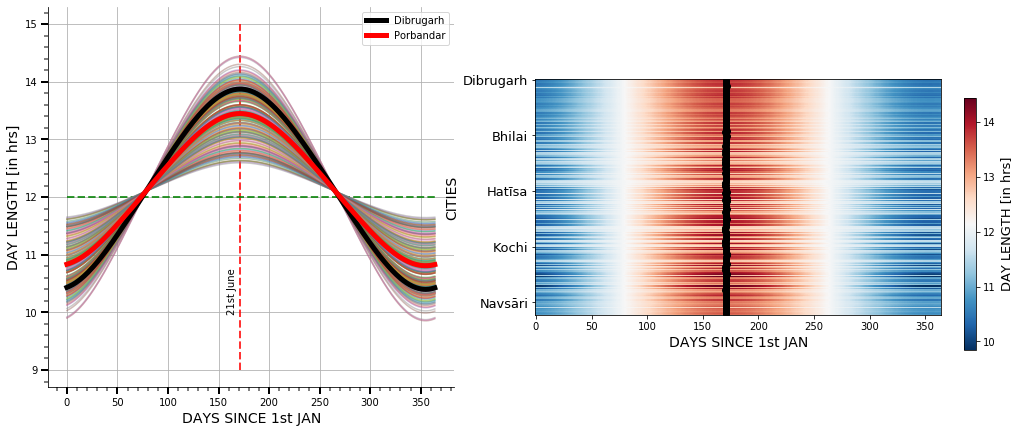

In [425]:
# plot daylength
day_max = np.argmax(sun_length_in_secs,axis=1)+1
# date_max = []
# for i in range(len(day_max)):
#     date_max.append(datetime.datetime(2019, 1, 1) + datetime.timedelta(day_max[i] - 1))

fig, ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot([171,171],[9,15],'--',color='red',linewidth=2,alpha=0.8)
ax[0].plot([0,365],[12,12],'--',color='green',linewidth=2,alpha=.8)
ax[0].plot(sun_length_in_secs.T/60/60,alpha=0.4)
ax[0].plot(sun_length_in_secs[0]/60/60,color='k',linewidth=5,label=df['city'][0])
ax[0].plot(sun_length_in_secs[-1]/60/60,color='r',linewidth=5,label=df['city'][len(df)-1])
ax[0].text(158,10,'21st June',rotation=90)
ax[0].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[0].set_ylabel("DAY LENGTH [in hrs]",fontsize=14)
ax[0].grid(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)
ax[0].tick_params(which='minor', length=4, color='gray')
ax[0].legend()
im = ax[1].imshow(sun_length_in_secs/60/60, cmap='RdBu_r')
ax[1].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[1].set_ylabel("CITIES",fontsize=14)
divider = make_axes_locatable(ax[1])
colorbar_ax = fig.add_axes([.92, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=colorbar_ax)
cbar.set_label('DAY LENGTH [in hrs]',size=13)
ax[1].plot(day_max-1,np.arange(0,sun_length_in_secs.shape[0],1),'o-',color='k')
yticks = [0,50,100,150,200]
keys = []
for i in range(len(yticks)):
    keys.append(df['city'][yticks[i]])
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(keys,rotation=0,fontsize=13)
plt.show()

You can see that there is a nice peak around 21st June for the day length data plotted for the 212 cities. For the majority of the cities this happens to be exactly 21st June. Here, Dibrugarh is the eastern most city in our database, and Porbander is the westtern most. The intersting is also the variation in the trace of day length across the cities. Also, note that there are two days of the year on which day length is excatly 12 hrs! These dates correspond to the equinox.

### Next, lets visualize the sunrise times. The code is given below.

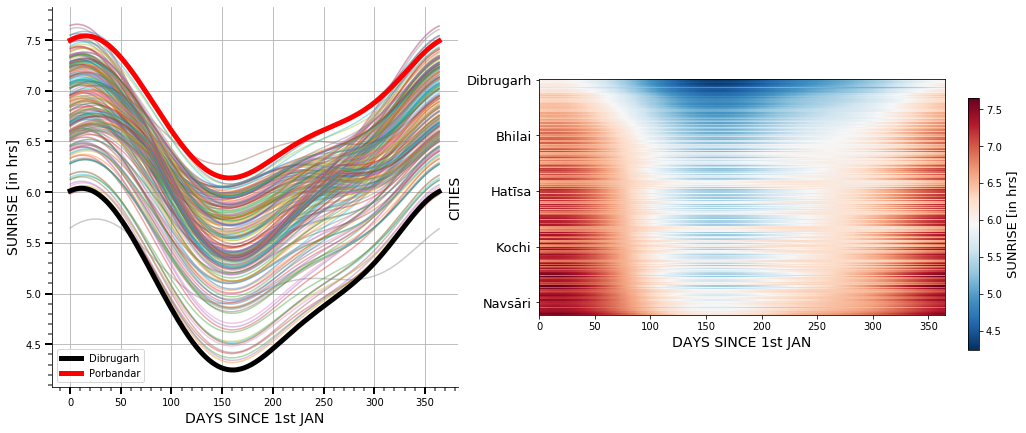

In [426]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot(sun_rise_in_secs.T/60/60,alpha=0.4)
ax[0].plot(sun_rise_in_secs[0]/60/60,color='k',linewidth=5,label=df['city'][0])
ax[0].plot(sun_rise_in_secs[-1]/60/60,color='r',linewidth=5,label=df['city'][len(df)-1])
ax[0].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[0].set_ylabel("SUNRISE [in hrs]",fontsize=14)
ax[0].grid(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)
ax[0].tick_params(which='minor', length=4, color='gray')
ax[0].legend()

im = ax[1].imshow(sun_rise_in_secs/60/60, cmap='RdBu_r')
ax[1].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[1].set_ylabel("CITIES",fontsize=14)
divider = make_axes_locatable(ax[1])
colorbar_ax = fig.add_axes([.92, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=colorbar_ax)
cbar.set_label('SUNRISE [in hrs]',size=13)
yticks = [0,50,100,150,200]
keys = []
for i in range(len(yticks)):
    keys.append(df['city'][yticks[i]])
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(keys,rotation=0,fontsize=13)
plt.show()

In the above plots you can see a nice variation in sunrise times across the year. Further, the eastern most city sees an early sunrise compared to the western most. Also, sunrises early in summer and late in winter!

### Next, lets visualiza the sunset times. The code snippet is given below. 

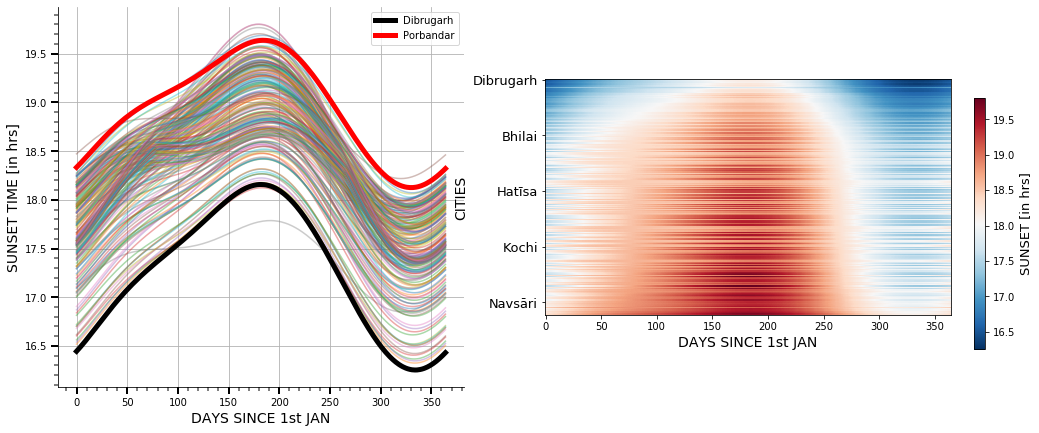

In [427]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot(sun_set_in_secs.T/60/60,alpha=0.4)
ax[0].plot(sun_set_in_secs[0]/60/60,color='k',linewidth=5,label=df['city'][0])
ax[0].plot(sun_set_in_secs[-1]/60/60,color='r',linewidth=5,label=df['city'][len(df)-1])
ax[0].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[0].set_ylabel("SUNSET TIME [in hrs]",fontsize=14)
ax[0].grid(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)
ax[0].tick_params(which='minor', length=4, color='gray')
ax[0].legend()

im = ax[1].imshow(sun_set_in_secs/60/60, cmap='RdBu_r')
ax[1].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[1].set_ylabel("CITIES",fontsize=14)
divider = make_axes_locatable(ax[1])
colorbar_ax = fig.add_axes([.92, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=colorbar_ax)
cbar.set_label('SUNSET [in hrs]',size=13)
yticks = [0,50,100,150,200]
keys = []
for i in range(len(yticks)):
    keys.append(df['city'][yticks[i]])
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(keys,rotation=0,fontsize=13)
plt.show()

Here again we see a nice pattern composed of a peak and a trough.

### Next, lets plot the time of noon, or the time when the sun is at its highest point directly above the observer. Below is the code snippet to plot it.

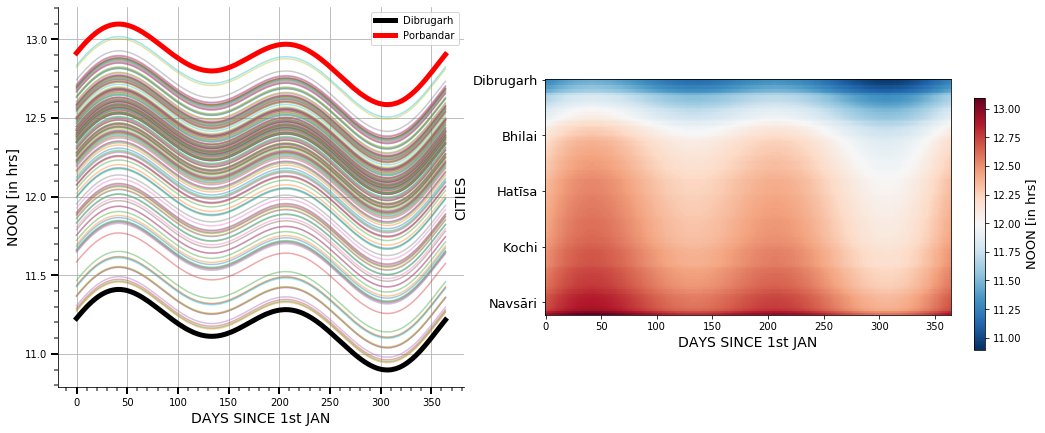

In [428]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot(sun_overhead_in_secs.T/60/60,alpha=0.4)
ax[0].plot(sun_overhead_in_secs[0]/60/60,color='k',linewidth=5,label=df['city'][0])
ax[0].plot(sun_overhead_in_secs[-1]/60/60,color='r',linewidth=5,label=df['city'][len(df)-1])
ax[0].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[0].set_ylabel("NOON [in hrs]",fontsize=14)
ax[0].grid(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)
ax[0].tick_params(which='minor', length=4, color='gray')
ax[0].legend()

im = ax[1].imshow(sun_overhead_in_secs/60/60, cmap='RdBu_r')
ax[1].set_xlabel("DAYS SINCE 1st JAN",fontsize=14)
ax[1].set_ylabel("CITIES",fontsize=14)
divider = make_axes_locatable(ax[1])
colorbar_ax = fig.add_axes([.92, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=colorbar_ax)
cbar.set_label('NOON [in hrs]',size=13)
yticks = [0,50,100,150,200]
keys = []
for i in range(len(yticks)):
    keys.append(df['city'][yticks[i]])
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(keys,rotation=0,fontsize=13)
plt.show()

Here we see something which I didn't expect. India has one timezone and hence, we see a gradual increase in noon time from east to west. But what are those sinusoidal patterns, and also there is a downward moving trend.  

# That's it

* We verified that there does exist a longest day around 21st June. For majority of the cities this day was 21st June, and for few others it was 20 or 22 June. Also, we did not verify here, but it appears that around 21st June the day lengths differ by few seconds.

* Twice is an year the day length is equal to the night length.

* The noon time varies across the year in a pattern which does seems interesting.

On top of this, I also find it interesting our we can estimate the sunrise/sunset/noon times using some math equations. There is a [wiki](https://en.wikipedia.org/wiki/Sunrise_equation) article on this. I will try to know more on this sometime. As of know, I will like to thank the [astral package](https://astral.readthedocs.io/en/latest/index.html) for the implementation. I tried first using a free API but the query to get the data was taking time in hrs. I will also like to than [Vishu Guttal](https://twitter.com/vishuguttal?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) for sharing the nice initiative and also publishing it in [Resonance](https://www.ias.ac.in/article/fulltext/reso/020/03/0254-0259), a Science Communication journal. 